In [388]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
#from BRScraper import nba

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
#import shap
import os
import pickle

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
import matplotlib.pyplot as plt


pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [389]:
df1 = pd.read_excel('NBA Talent Analysis Part BandC data.xlsx', sheet_name = 'NBA Data')
df2 = pd.read_excel('NBA Talent Analysis Part BandC data.xlsx', sheet_name = 'NBA Salary Cap History')

In [390]:
df1.head()

,Player,Deal Average Salary,Deal_Year,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,3PAr,FTr,USG%,OWS,DWS,WS,RFA
0,Klay Thompson,37980720,2019,29,78,78,2652,655,1402,0.47,241,599,0.40,0.55,129,158,0.82,37,262,299,186,84,47,115,157,1680,0.43,0.11,25.60,2.90,2.30,5.30,0
1,Tobias Harris,36000000,2019,27,82,82,2847,611,1254,0.49,156,393,0.40,0.55,266,307,0.87,69,576,645,229,51,37,151,184,1644,0.31,0.24,22.80,4.50,2.60,7.10,0
2,Khris Middleton,35500000,2019,28,77,77,2393,506,1148,0.44,179,474,0.38,0.52,216,258,0.84,50,411,461,331,80,7,174,172,1407,0.41,0.23,25.10,2.50,3.60,6.10,0
3,Kevin Durant,41063925,2019,31,78,78,2702,721,1383,0.52,137,388,0.35,0.57,448,506,0.89,33,464,497,457,58,84,225,155,2027,0.28,0.37,29.00,8.60,2.90,11.50,0
4,Kristaps Porzingis,31650600,2019,24,48,48,1553,390,889,0.44,90,228,0.40,0.49,218,275,0.79,62,254,316,57,36,115,93,141,1088,0.26,0.31,31.00,1.40,1.80,3.20,1


In [391]:
new_header = df2.iloc[0]  # take the first row for the header
df2 = df2[1:]  # take the data less the header row
df2.columns = new_header  # set the header row as the df header

# Drop any unnamed columns
df2 = df2.loc[:, ~df2.columns.str.contains('^Unnamed')]

# Optionally, convert columns to more appropriate data types
df2['Salary Cap'] = df2['Salary Cap'].astype(int)
df2['Luxury Tax Line'] = df2['Luxury Tax Line'].astype(int)
df2['Salary Cap'] = df2['Salary Cap']/1000000
df2['Luxury Tax Line'] = df2['Luxury Tax Line']/1000000
df2.head()

,Season,Salary Cap,Luxury Tax Line
1,2019–20,109.14,132.63
2,2018–19,101.87,123.73
3,2017–18,99.09,119.27
4,2016–17,94.14,113.29
5,2015–16,70.00,84.74


In [392]:
df2['Season'] = df2['Season'].apply(lambda x: int(x.split('–')[0]))

# Rename the column in df2 to match df1 for merging
df2.rename(columns={'Season': 'Deal_Year'}, inplace=True)

# Merge df1 and df2
merged_df = pd.merge(df1, df2, on='Deal_Year', how='left')


## Data Wrangling 

In [393]:
sns.set(style='dark')
sns.set_theme(rc={'figure.dpi': 200}, font_scale=0.6)

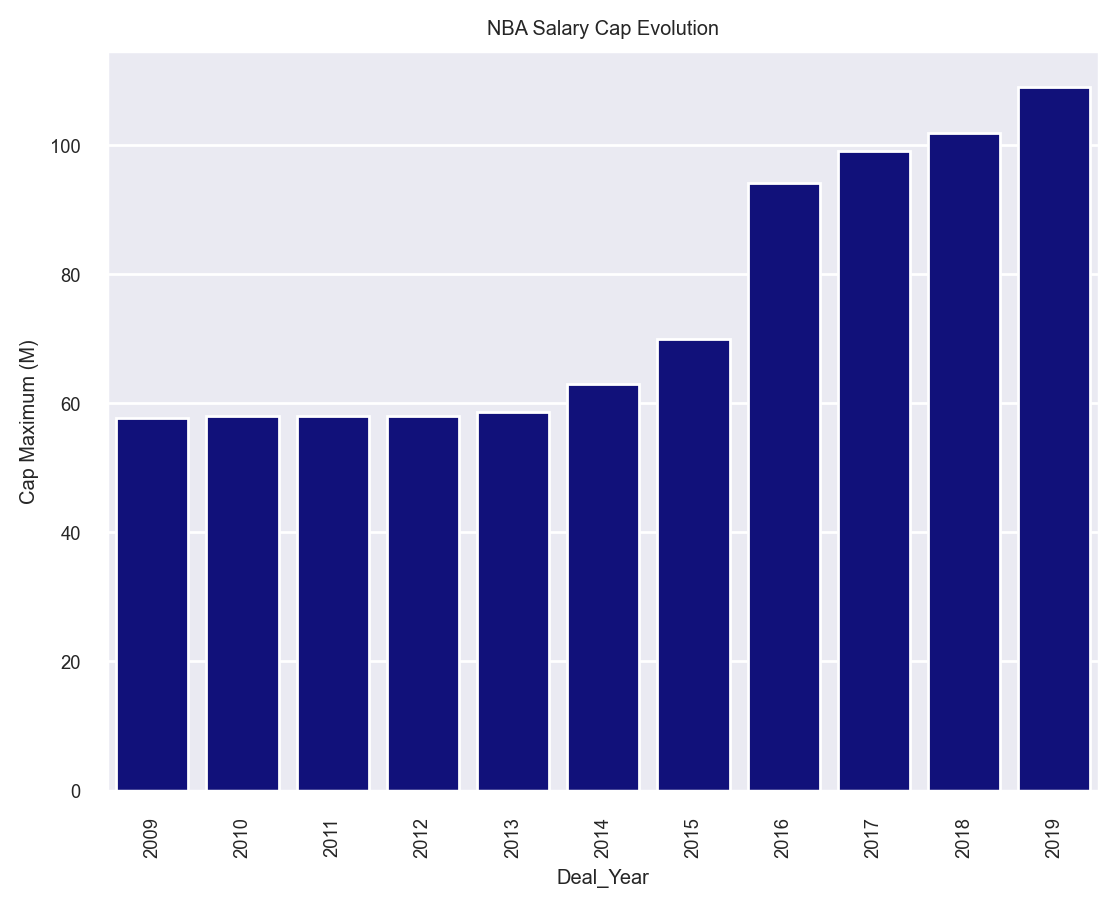

In [394]:
plt.xticks(rotation=90)
evol = sns.barplot(data=df2,x='Deal_Year',y='Salary Cap',color='darkblue').set(title='NBA Salary Cap Evolution')
plt.ylabel('Cap Maximum (M)');
#plt.savefig(path_data+sep+"salary_cap.jpg", dpi=300)

Text(0, 0.5, 'Number of players')

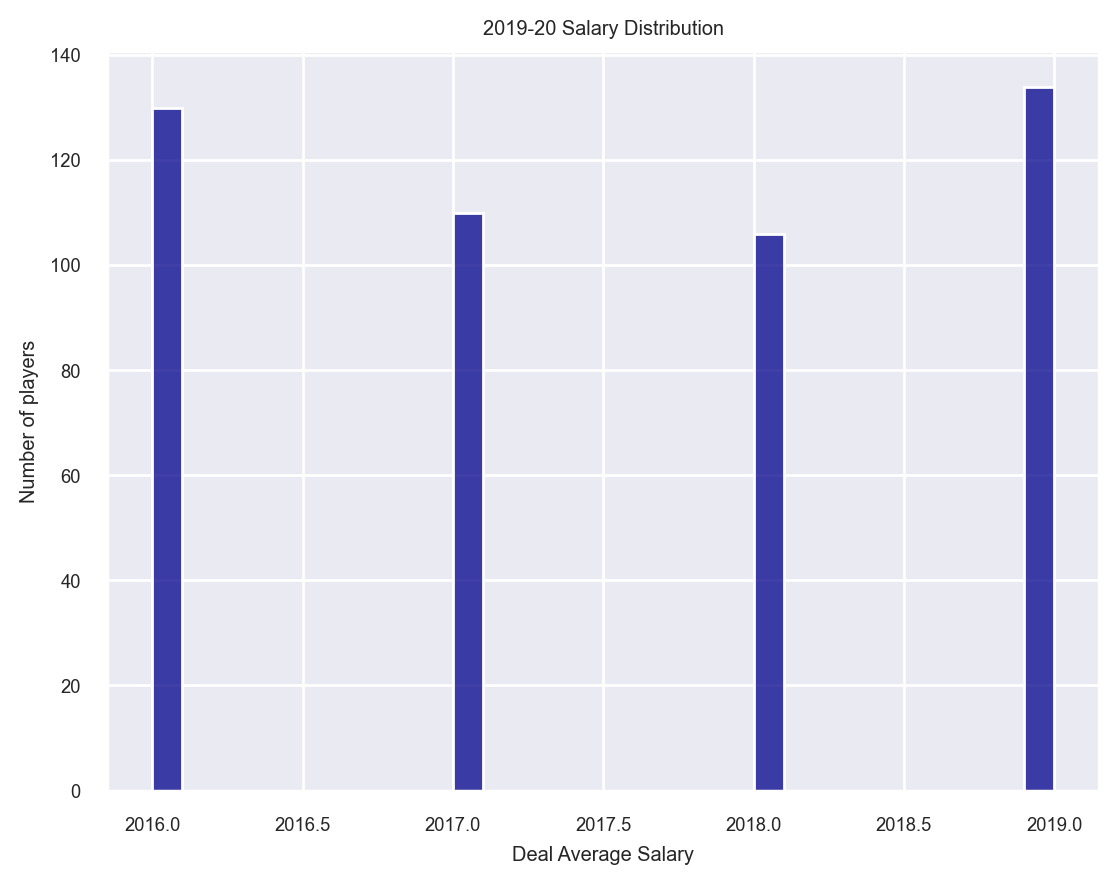

In [395]:
sns.histplot(data=df1,x='Deal_Year',bins=30,color='darkblue').set(title='2019-20 Salary Distribution');
plt.xlabel('Deal Average Salary')
plt.ylabel('Number of players')
#plt.savefig(path_data+sep+"salary_dist.jpg",dpi=300)

In [396]:
#player efficiency - pe
merged_df['PE'] = merged_df['PTS']/merged_df['MP']

#shooting efficicency - se
merged_df['SE'] = merged_df['FG']/merged_df['FGA']

##offensive and defensive wins share - ODS
#merged_df['ODS'] = merged_df['OWS']+merged_df['DWS']

##Interaction between age and minutes played (Age * MP)
merged_df['EMP'] = merged_df['Age']*merged_df['MP']

In [397]:
#feature_names = ['Age^{}'.format(i) for i in range(1, degree+1)]
#poly = PolynomialFeatures(degree=2, include_bias=False)
#poly_features = poly.fit_transform(merged_df[['Age']])
#poly_features
# Generate feature names for the polynomial features
#feature_names = poly.get_feature_names_out(input_features=['Age'])

# Create a DataFrame with the polynomial features
#poly_df = pd.DataFrame(poly_features, columns=feature_names)

#merged_df = merged_df.join(pd.DataFrame(poly_features, columns=poly.get_feature_names(['Age'])))
#poly_df = poly_df.reset_index(drop=True)

# Now join
#poly_df.rename(columns={'Age': 'Age_poly'}, inplace=True)

# Now join the DataFrames
#merged_df = merged_df.join(poly_df)

In [398]:
#merged_df['Age Group'] = pd.cut(merged_df['Age'], bins=[20, 25, 30, 35, 40], labels=['20-25', '26-30', '31-35', '36-40'])

# Using the salary cap and luxury tax line
#merged_df['Salary_Cap_Ratio'] = merged_df['Deal Average Salary'] / merged_df['Salary Cap']
#merged_df['Luxury_Tax_Difference'] = merged_df['Luxury Tax Line'] - merged_df['Deal Average Salary']


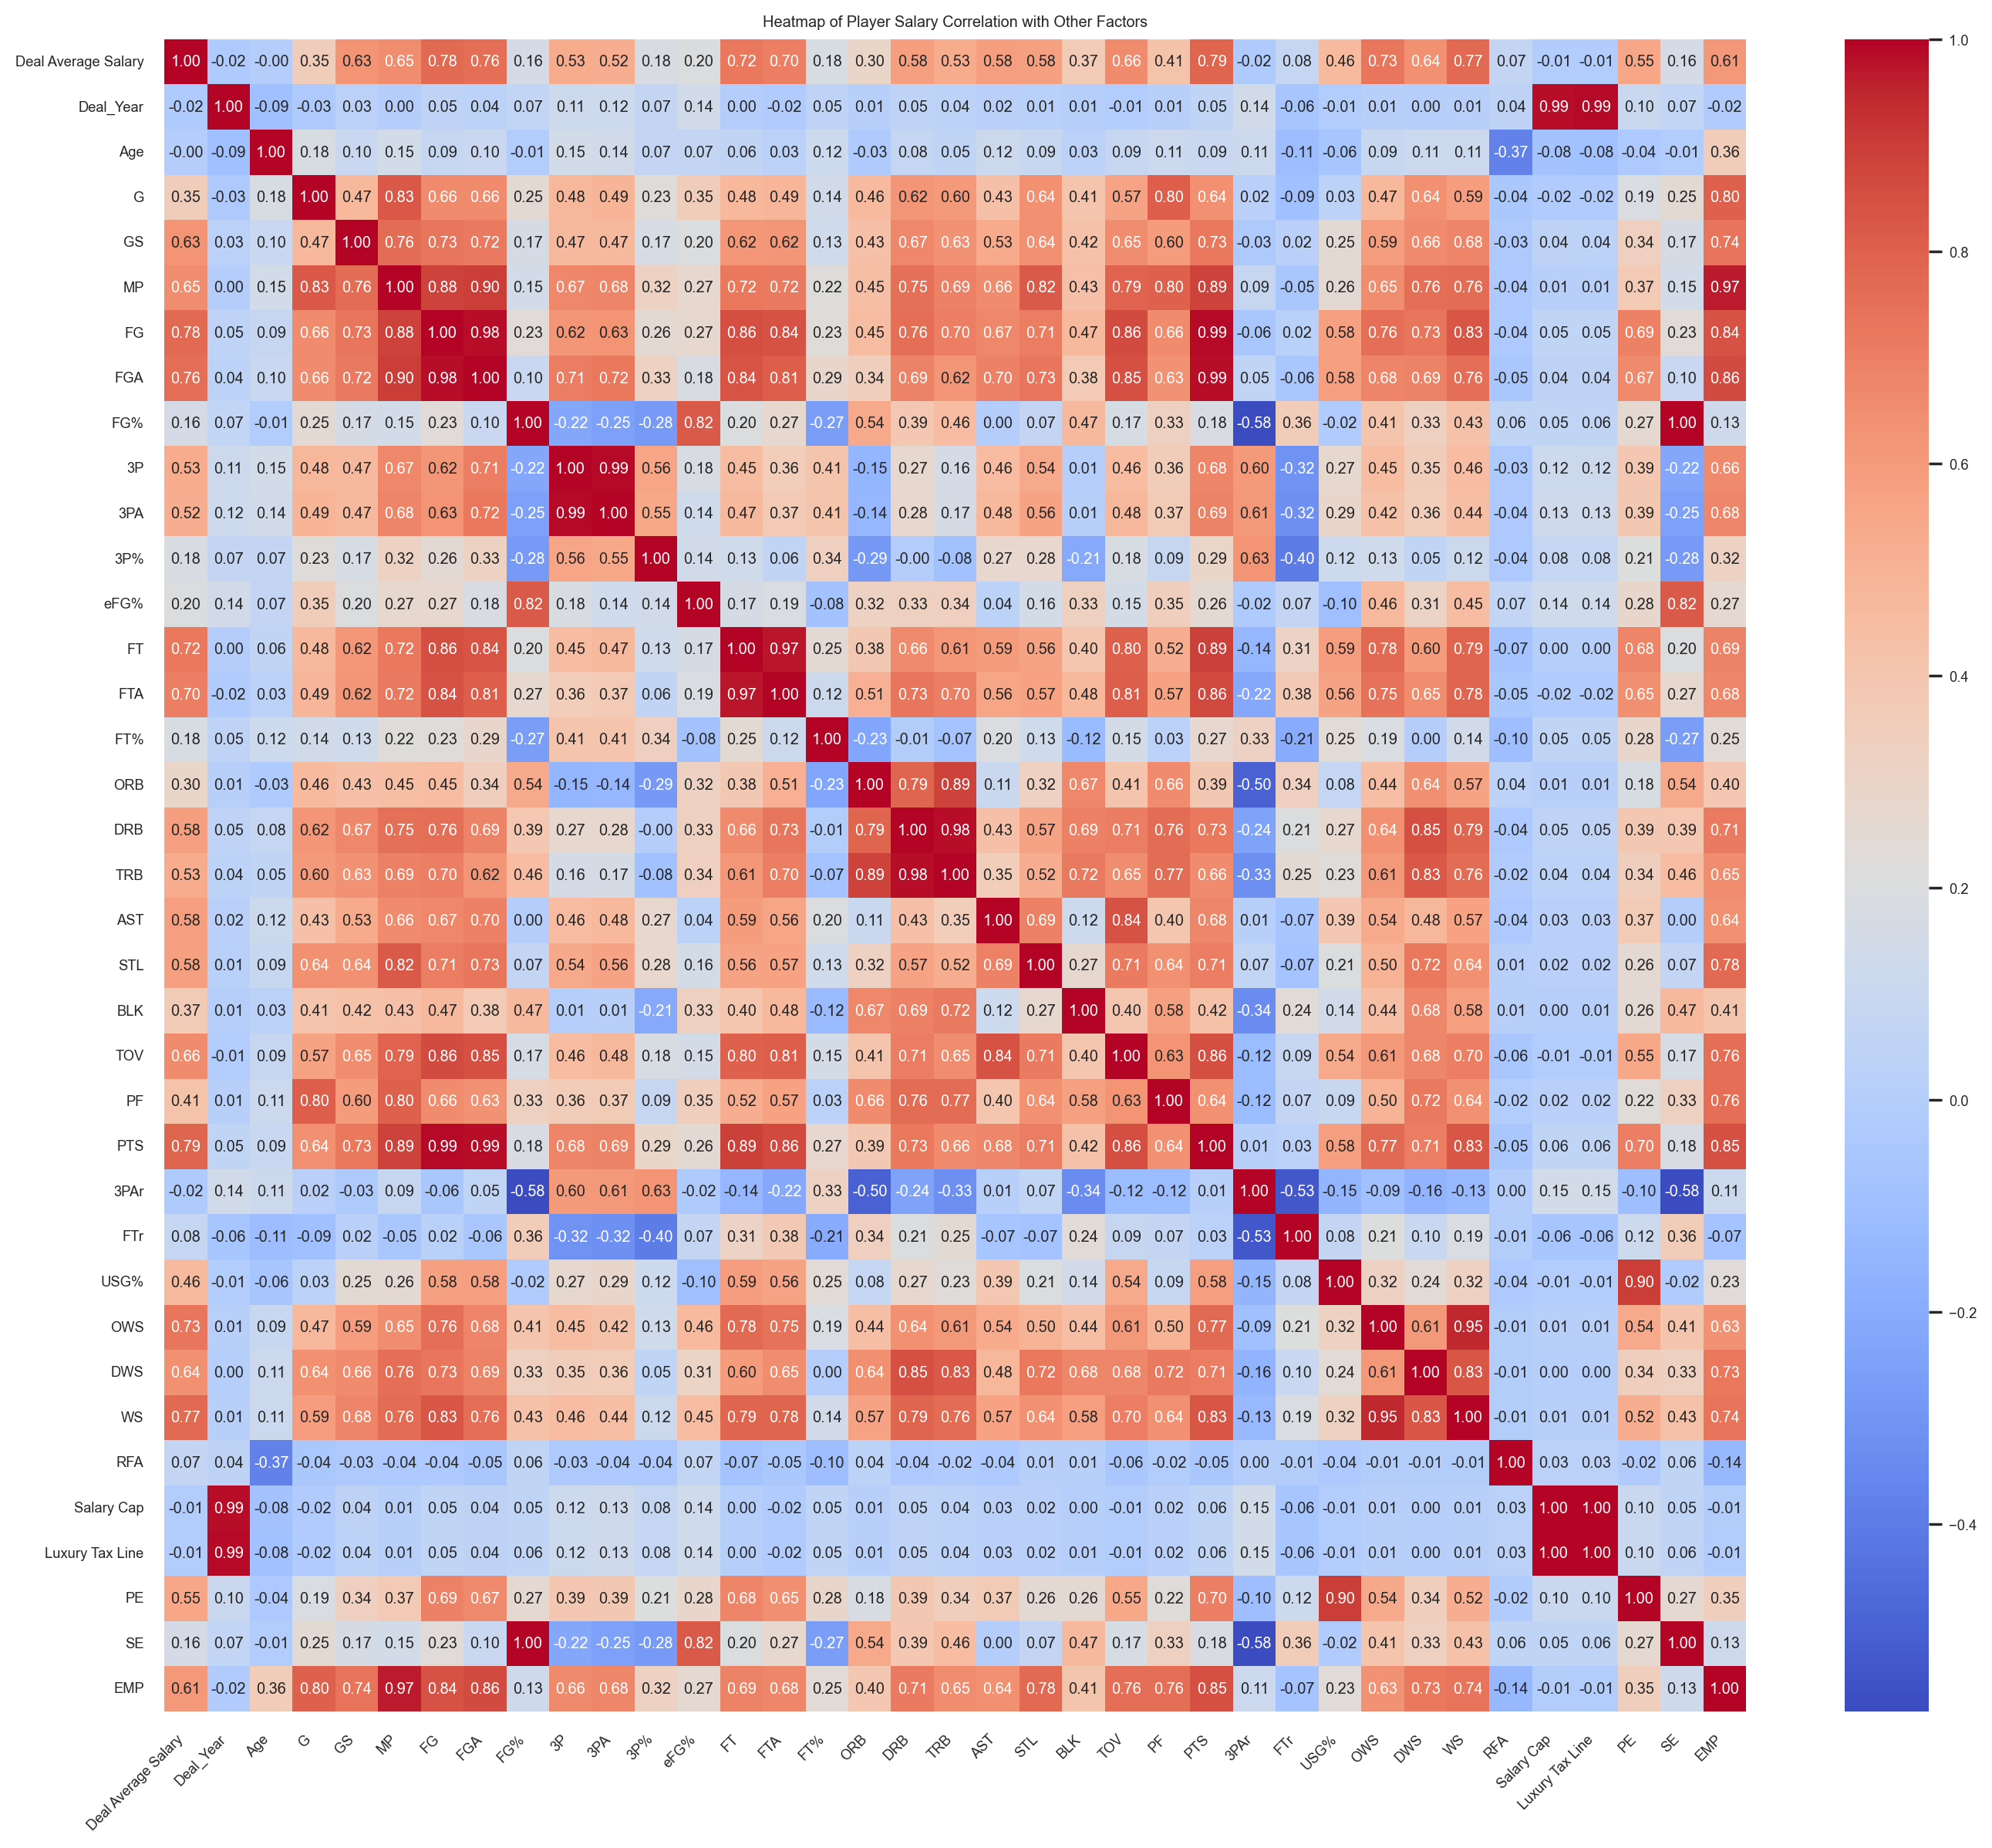

In [399]:
correlation_matrix = merged_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 12))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Improve the readability of the plot
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Heatmap of Player Salary Correlation with Other Factors')
plt.tight_layout()  # Adjusts the plot to ensure everything fits without overlapping

# Show the heatmap
plt.show()

## Model

In [400]:
merged_df.columns

Index(['Player', 'Deal Average Salary', 'Deal_Year', 'Age', 'G', 'GS', 'MP',
       'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', '3PAr',
       'FTr', 'USG%', 'OWS', 'DWS', 'WS', 'RFA', 'Salary Cap',
       'Luxury Tax Line', 'PE', 'SE', 'EMP'],
      dtype='object')

In [401]:
def func_metrics(y_test, y_pred, metrics, modelo):
    
    rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)),3) # RMSE
    r2 = round(r2_score(y_test, y_pred),3) # R²
    #acc = round(accuracy_score(y_test, np.round(y_pred)),3)
    dict_met = {'Model': [modelo],
                'RMSE': [rmse],
                'R²': [r2]
                }
    
    metric = pd.DataFrame(data=dict_met)
    metrics = pd.concat([metrics,metric])
    
    return metrics
def train_test_data(merged_df, df):
    print("Merged DF Length:", len(merged_df))
    print("DF Length:", len(df))

    # Check if both DataFrames align
    assert len(merged_df) == len(df), "The DataFrames do not align!"

    X = merged_df.drop(columns={'Player', 'Deal Average Salary', 'Deal_Year', 'Salary Cap', 'Luxury Tax Line','FG%','OWS','DWS','FGA','FG','MP'})
    #X = merged_df.drop(columns={'Player', 'Deal Average Salary', 'Deal_Year', 'Salary Cap', 'Luxury Tax Line'})
    #X = merged_df.drop(columns={'Player', 'Deal Average Salary', 'Deal_Year'})
    y = df['Deal Average Salary']

    # Check consistent lengths before splitting
    assert len(X) == len(y), "Feature and target variable lengths do not match!"

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.12, random_state=42)
    
    X_test = X_test.sample(frac=1, random_state=42)
    y_test = y_test.sample(frac=1, random_state=42)
    
    return X_train, X_test, y_train, y_test

# Example usage
#merged_df = df  # Make sure merged_df is correctly defined or aligned with df if they should be the same
X_train, X_test, y_train, y_test = train_test_data(merged_df,merged_df)


models = ['SVM','Random Forest','Elastic Net','AdaBoost','Gradient Boosting','XGBoost']
def func_scaler(X_train, X_test):
    
    scaler = StandardScaler()

    scaled_X_train = scaler.fit_transform(X_train)
    scaled_X_test = scaler.transform(X_test)
    
    #pickle.dump(scaler,open(path_data+sep+'Modelos'+sep+'standard_scaler_FAs.dat','wb'))
    
    return scaled_X_train, scaled_X_test


Merged DF Length: 480
DF Length: 480


In [416]:
def func_models(scaled_X_train, scaled_X_test, y_train, y_test, models):
    metrics = pd.DataFrame()
    best_params = []
    cv_results = {}
    grid_search_details = {}
    
    path_data = "/Users/chhavisharma/Downloads"
    os.makedirs(path_data, exist_ok=True)
    
    for modelo in models:
        # Creating instance for each model
        if modelo=='SVM':
            param_grid = {'C': [0.001,0.01,0.1,0.5,1,2,5],
                         'kernel': ['linear','rbf','poly'],
                         'gamma': ['scale','auto'],
                         'degree': [2,3,4],
                         'epsilon': [0.1,0.5,1]}
            svr_model = SVR()
            grid = GridSearchCV(svr_model, param_grid,cv=5, n_jobs=-1)
            grid.fit(scaled_X_train, y_train)
            model = SVR(**grid.best_params_)
            best_params.append(grid.best_params_)
            cv_results = grid.cv_results_
            grid_search_details[modelo] = grid.cv_results_

        elif modelo=='Elastic Net':
            param_grid = {'alpha':[0.01,0.1,1,5,10,50,100],
                          'l1_ratio':[0.01,0.1,0.5,0.7,0.95,1]}
            elastic_net_model = ElasticNet()
            grid = GridSearchCV(elastic_net_model, param_grid,cv=5, n_jobs=-1)
            grid.fit(scaled_X_train, y_train)
            grid.best_params_
            model = ElasticNet(**grid.best_params_)
            best_params.append(grid.best_params_)
            cv_results = grid.cv_results_
            grid_search_details[modelo] = grid.cv_results_
            

        elif modelo=='Random Forest':
            param_grid = {'n_estimators': [15,25,50,64,100,200],
                         'max_features': [2,3,5],
                         'bootstrap': [True,False],
                         'oob_score': [True]}
            rfc = RandomForestRegressor()
            grid = GridSearchCV(rfc, param_grid,cv=5, n_jobs=-1)
            grid.fit(scaled_X_train, y_train)
            model = RandomForestRegressor(**grid.best_params_)
            best_params.append(grid.best_params_)
            cv_results = grid.cv_results_
            grid_search_details[modelo] = grid.cv_results_

        elif modelo=='AdaBoost':
            param_grid = {'n_estimators': [5,10,25,50,100],
                         'learning_rate': [0.01,0.05,0.1,0.25,0.5]}
            ada_model = AdaBoostRegressor()
            grid = GridSearchCV(ada_model, param_grid,cv=5, n_jobs=-1)
            grid.fit(scaled_X_train, y_train)
            model = AdaBoostRegressor(**grid.best_params_)
            best_params.append(grid.best_params_)
            cv_results = grid.cv_results_
            grid_search_details[modelo] = grid.cv_results_

        elif modelo=='Gradient Boosting':
            param_grid = {'n_estimators': [10,25,50],
                         'learning_rate': [0.01,0.05,0.1,0.5],
                         'max_depth': [3,4,5]}
            gb_model = GradientBoostingRegressor()
            grid = GridSearchCV(gb_model, param_grid,cv=5, n_jobs=-1)
            grid.fit(scaled_X_train, y_train)
            model = GradientBoostingRegressor(**grid.best_params_)
            best_params.append(grid.best_params_)
            cv_results = grid.cv_results_
            grid_search_details[modelo] = grid.cv_results_
        
        elif modelo == 'XGBoost':
            param_grid = {'n_estimators': [100, 200, 300],
                          'learning_rate': [0.01, 0.05, 0.1],
                          'max_depth': [3, 4, 5],
                          'colsample_bytree': [0.3, 0.7, 1.0],
        # Add other parameters you wish to tune
                            }
            xgb_model = XGBRegressor(objective='reg:squarederror')
            grid = GridSearchCV(xgb_model, param_grid, cv=5, n_jobs=-1)
            grid.fit(scaled_X_train, y_train)
            model = XGBRegressor(**grid.best_params_)
            best_params.append(grid.best_params_)
            cv_results = grid.cv_results_
            grid_search_details[modelo] = grid.cv_results_


        model.fit(scaled_X_train, y_train)
        filename = os.path.join(path_data, f"{modelo}_FAs.pkl")
        with open(filename, 'wb') as file:
            pickle.dump(model, file)
        
        #pickle.dump(model,open(path_data+sep+'Modelos'+sep+modelo+'_FAs.dat','wb'))

        y_pred = model.predict(scaled_X_test)
        metrics = func_metrics(y_test, y_pred, metrics, modelo)
    
    #np.savetxt(path_data+sep+r'Modelos\params_FAs.csv', best_params, delimiter =', ', fmt ='% s')
    
    metrics['R²'] = metrics['R²'].apply(lambda x: '%.3f' % x)
    
    return metrics, best_params,cv_results, grid_search_details

In [417]:
scaled_X_train, scaled_X_test = func_scaler(X_train, X_test)

In [418]:
metrics, best_params,cv_results, grid_search_details = func_models(scaled_X_train, scaled_X_test, y_train, y_test, models)

/Users/chhavisharma/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/chhavisharma/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/chhavisharma/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/chhavisharma/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/chhavisharma/anaconda3/lib/python3.11/site-packages/sklearn/ensem

In [419]:
metrics

,Model,RMSE,R²
0,SVM,8062600.09,-0.156
0,Random Forest,4313715.76,0.669
0,Elastic Net,4343307.87,0.665
0,AdaBoost,4737367.33,0.601
0,Gradient Boosting,4638844.95,0.617
0,XGBoost,4378221.45,0.659


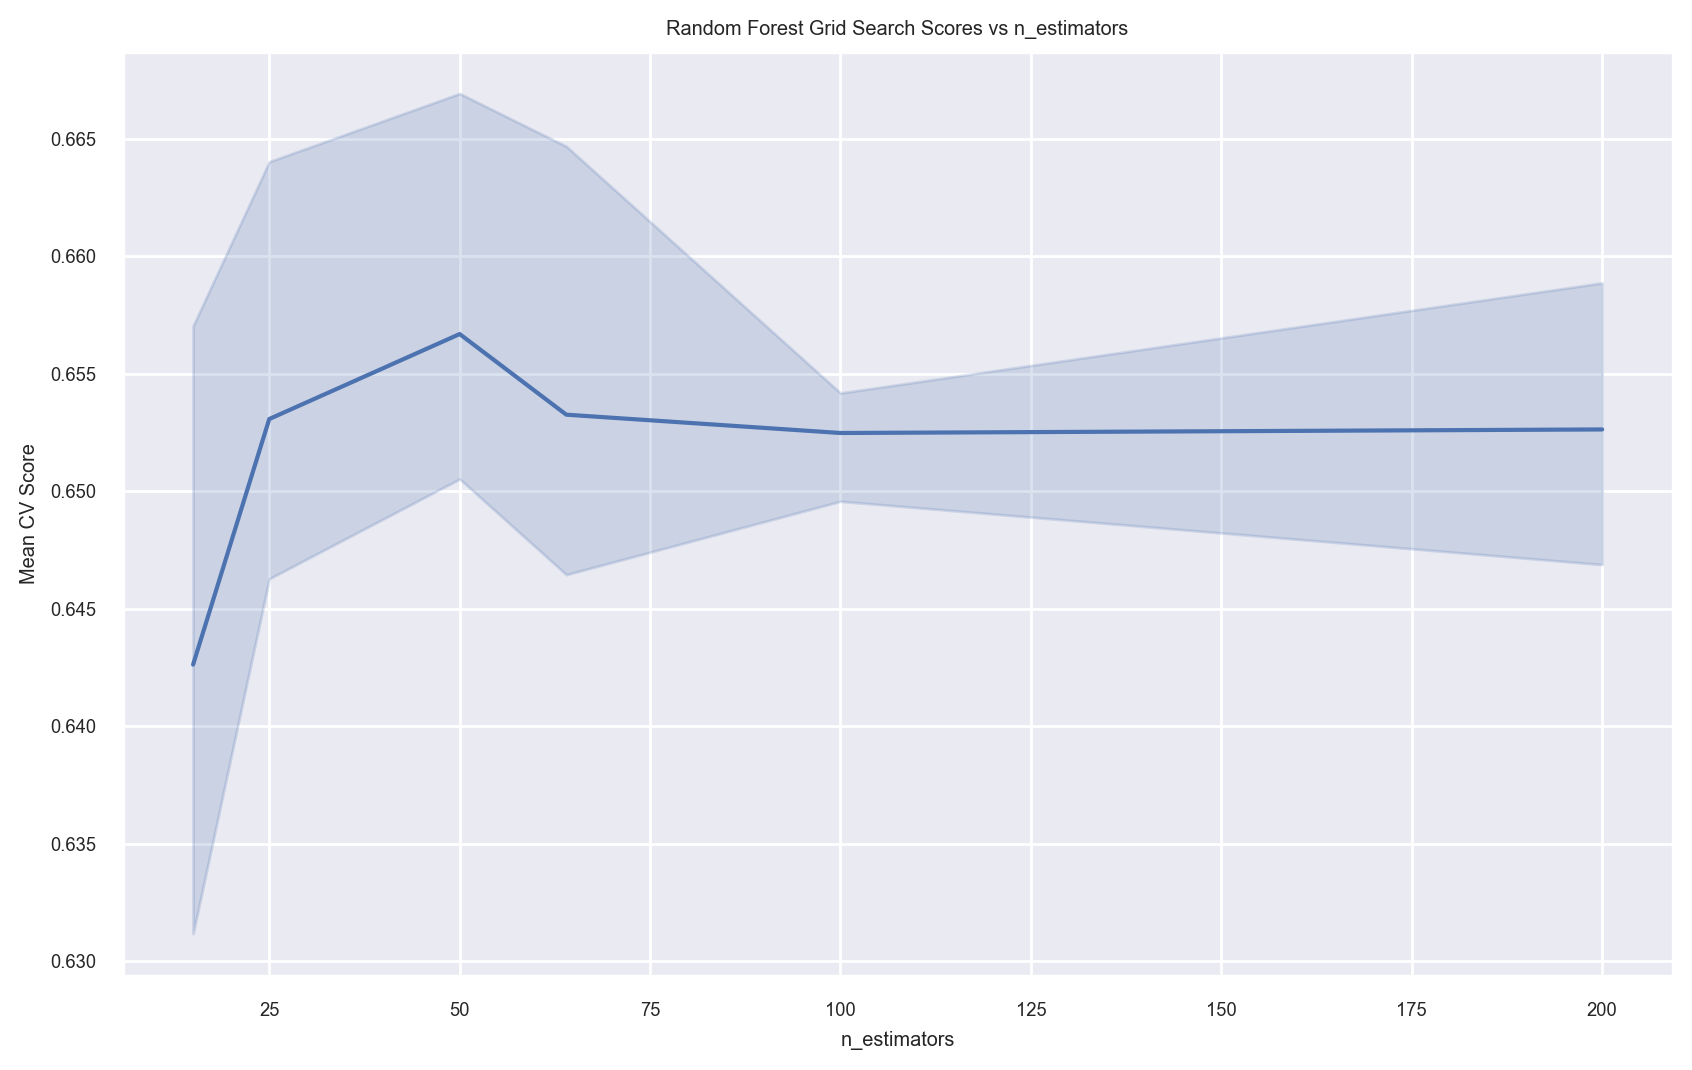

In [421]:
def plot_grid_search(grid_search_detail, parameter, model_name):
    param_grid_df = pd.DataFrame(grid_search_detail)
    # We filter out rows for this parameter and reshape
    param_grid_df = param_grid_df.loc[param_grid_df['param_' + parameter].notnull()]
    param_grid_df = param_grid_df.sort_values(by='param_' + parameter)
    
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=param_grid_df, x='param_' + parameter, y='mean_test_score', markers=True)
    plt.title(model_name + ' Grid Search Scores vs ' + parameter)
    plt.xlabel(parameter)
    plt.ylabel('Mean CV Score')
    plt.show()

# Visualize results for Random Forest n_estimators parameter
plot_grid_search(grid_search_details['Random Forest'], 'n_estimators', 'Random Forest')

In [320]:
xgb_model = XGBRegressor(objective='reg:squarederror',n_estimators = 100,
                          learning_rate = 0.05,
                          max_depth = 4 ,
                          colsample_bytree = 0.3)
xgb_model.fit(scaled_X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [321]:
y_train_pred = xgb_model.predict(scaled_X_train)
y_test_pred = xgb_model.predict(scaled_X_test)

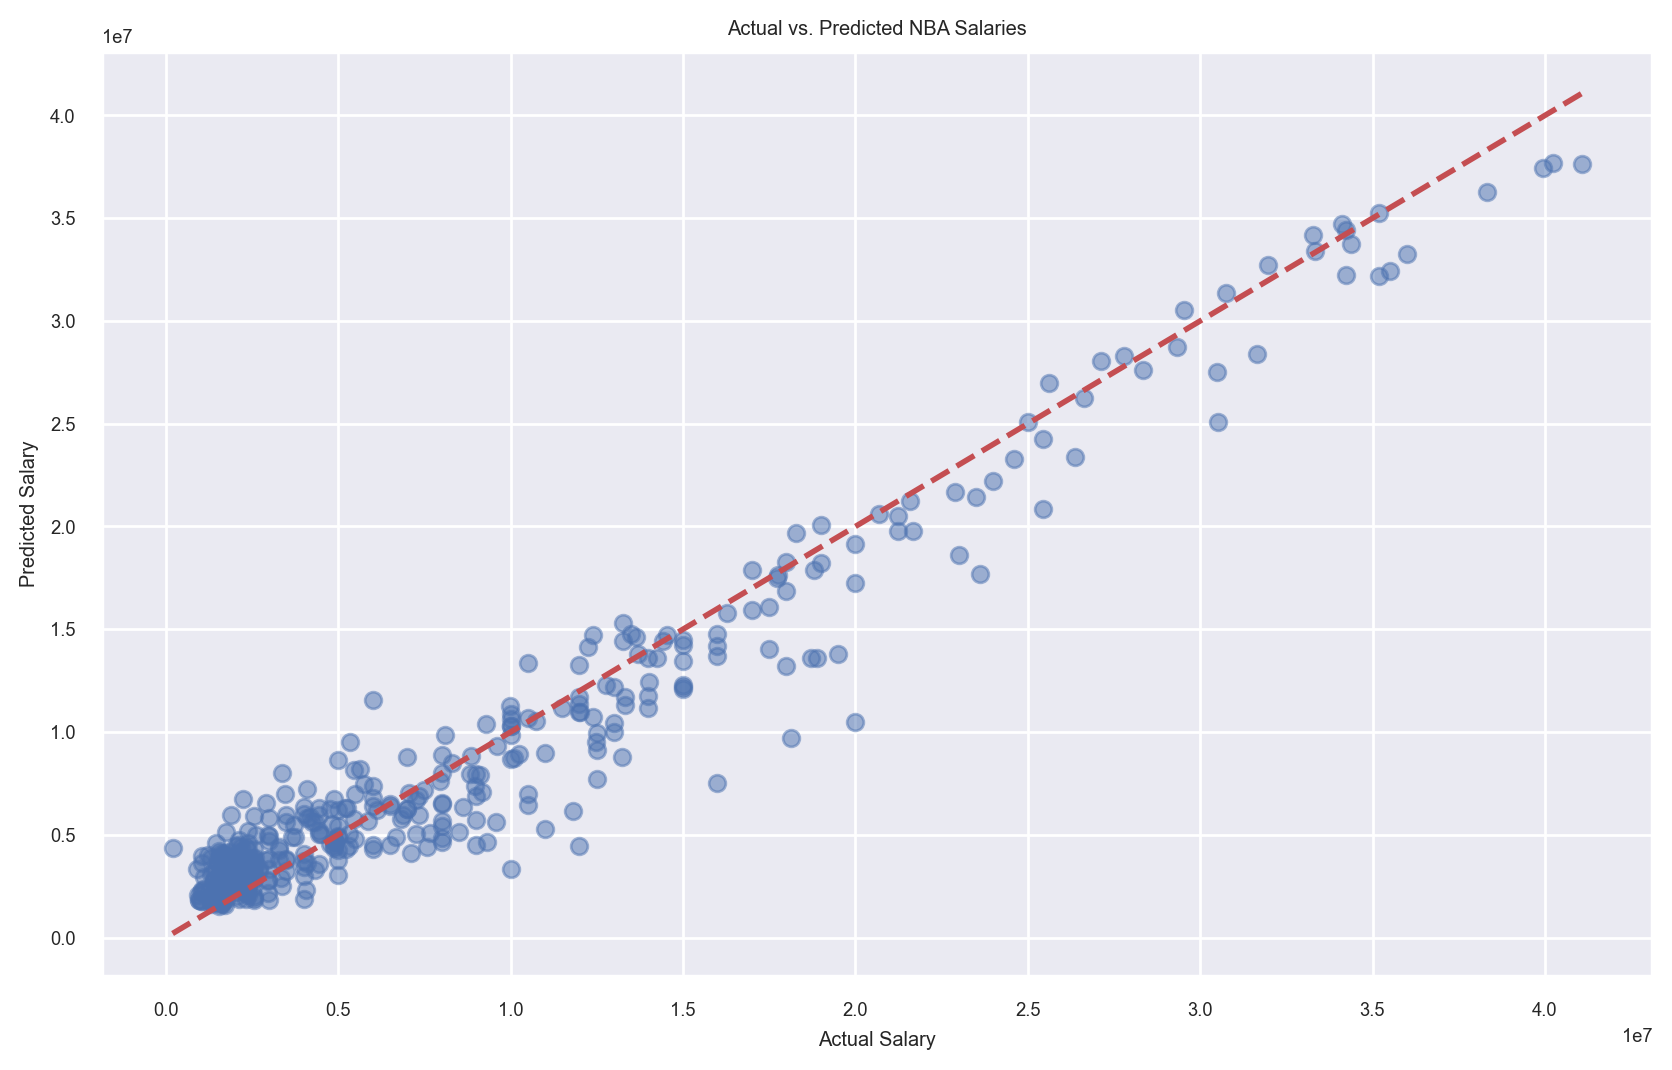

In [380]:

def plot_predictions(y_test, y_pred, title='Actual vs. Predicted Salaries'):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
    plt.xlabel('Actual Salary')
    plt.ylabel('Predicted Salary')
    plt.title(title)
    plt.show()

# Example usage
# Assuming y_test and y_pred are available from your predictions
plot_predictions(y_train,y_train_pred, title='Actual vs. Predicted NBA Salaries')

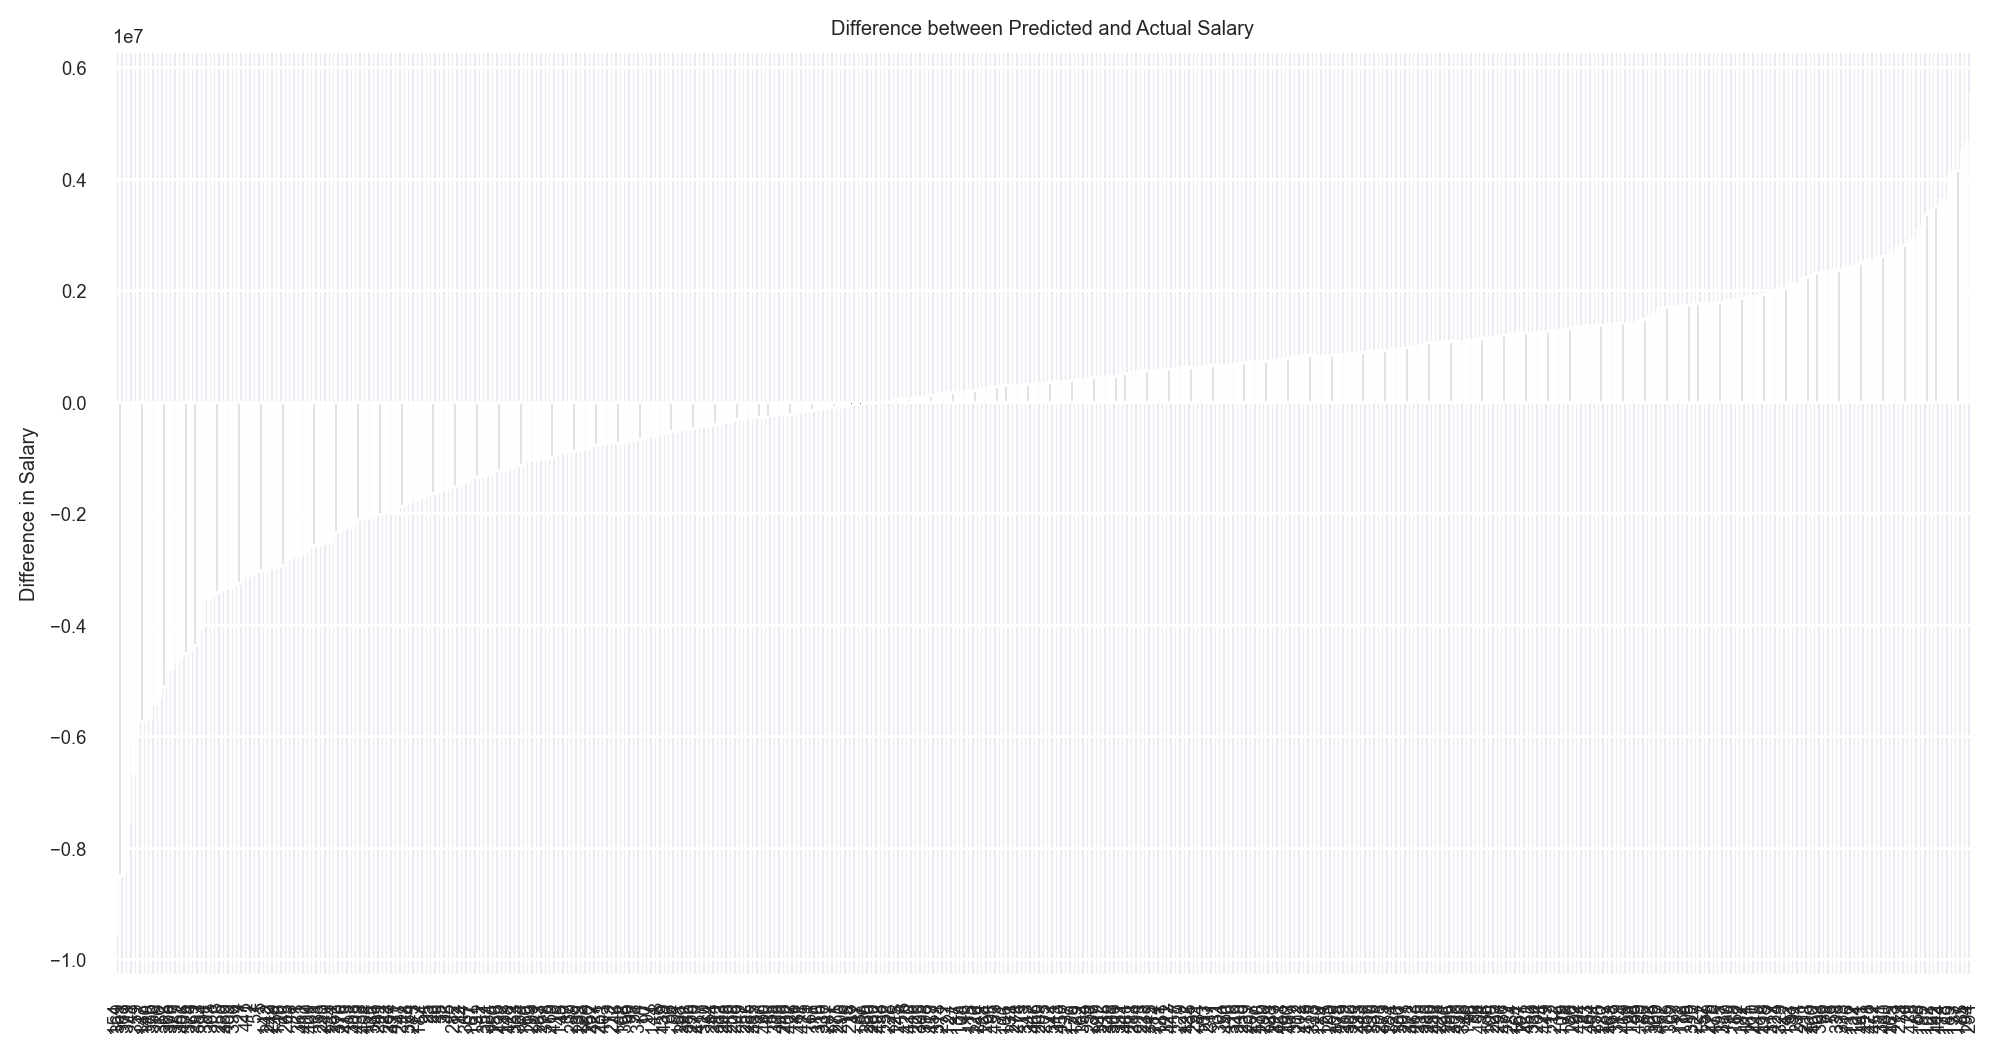

In [383]:
def display_differences(y_test, y_pred):
    # Calculate differences
    differences = y_pred - y_test
    result = pd.DataFrame({'Actual Salary': y_test, 'Predicted Salary': y_pred, 'Difference': differences})
    result.sort_values(by='Difference', inplace=True)
    
    # Plot differences
    plt.figure(figsize=(12, 6))
    result['Difference'].plot(kind='bar', color='black')
    plt.ylabel('Difference in Salary')
    plt.title('Difference between Predicted and Actual Salary')
    plt.show()
    
    return result

# Assuming y_test and y_pred are Series and properly aligned
result_df = display_differences(y_train,y_train_pred)

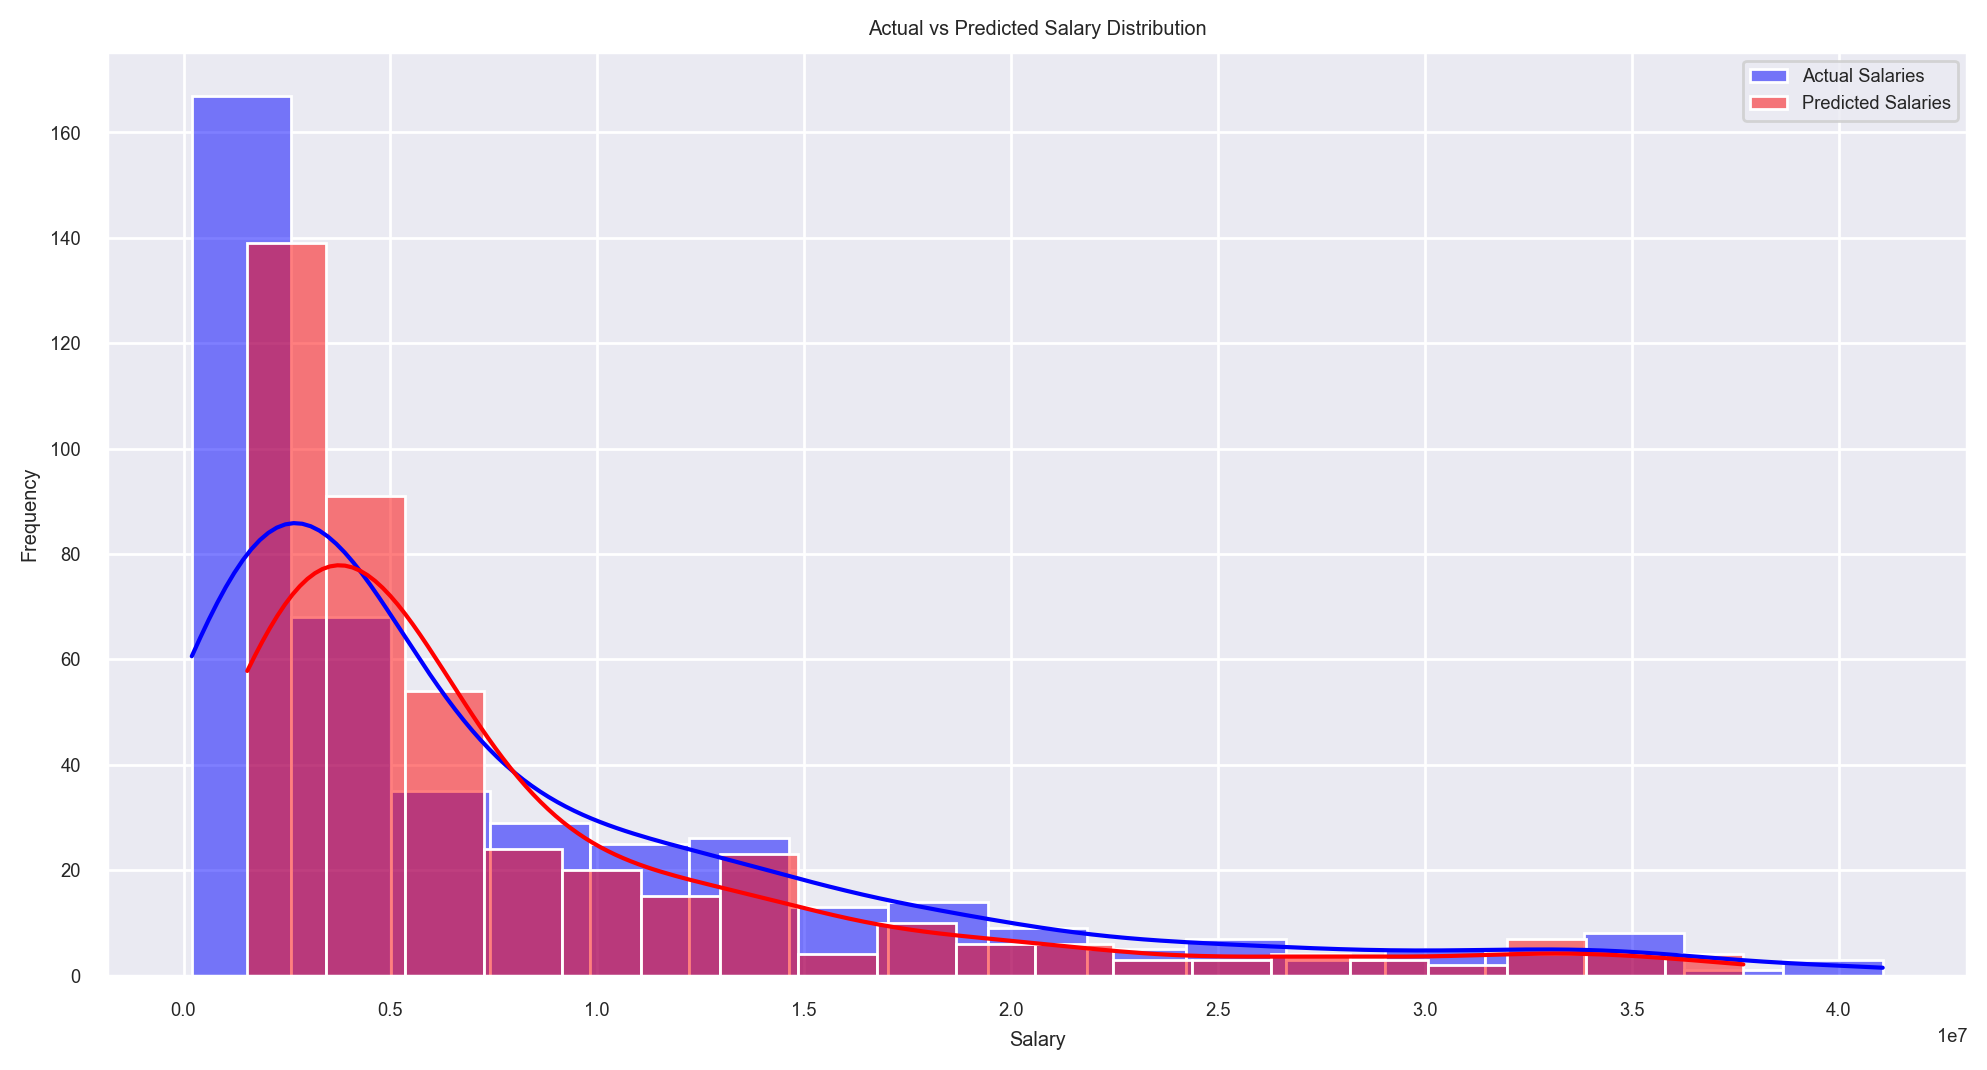

In [384]:
# Assuming y_test contains the actual salaries and y_pred contains the predicted salaries
plt.figure(figsize=(12, 6))

# Histogram of actual salaries
sns.histplot(y_train, color="blue", label='Actual Salaries', kde=True)

# Histogram of predicted salaries
sns.histplot(y_train_pred, color="red", label='Predicted Salaries', kde=True)

plt.title('Actual vs Predicted Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.legend()
plt.show()


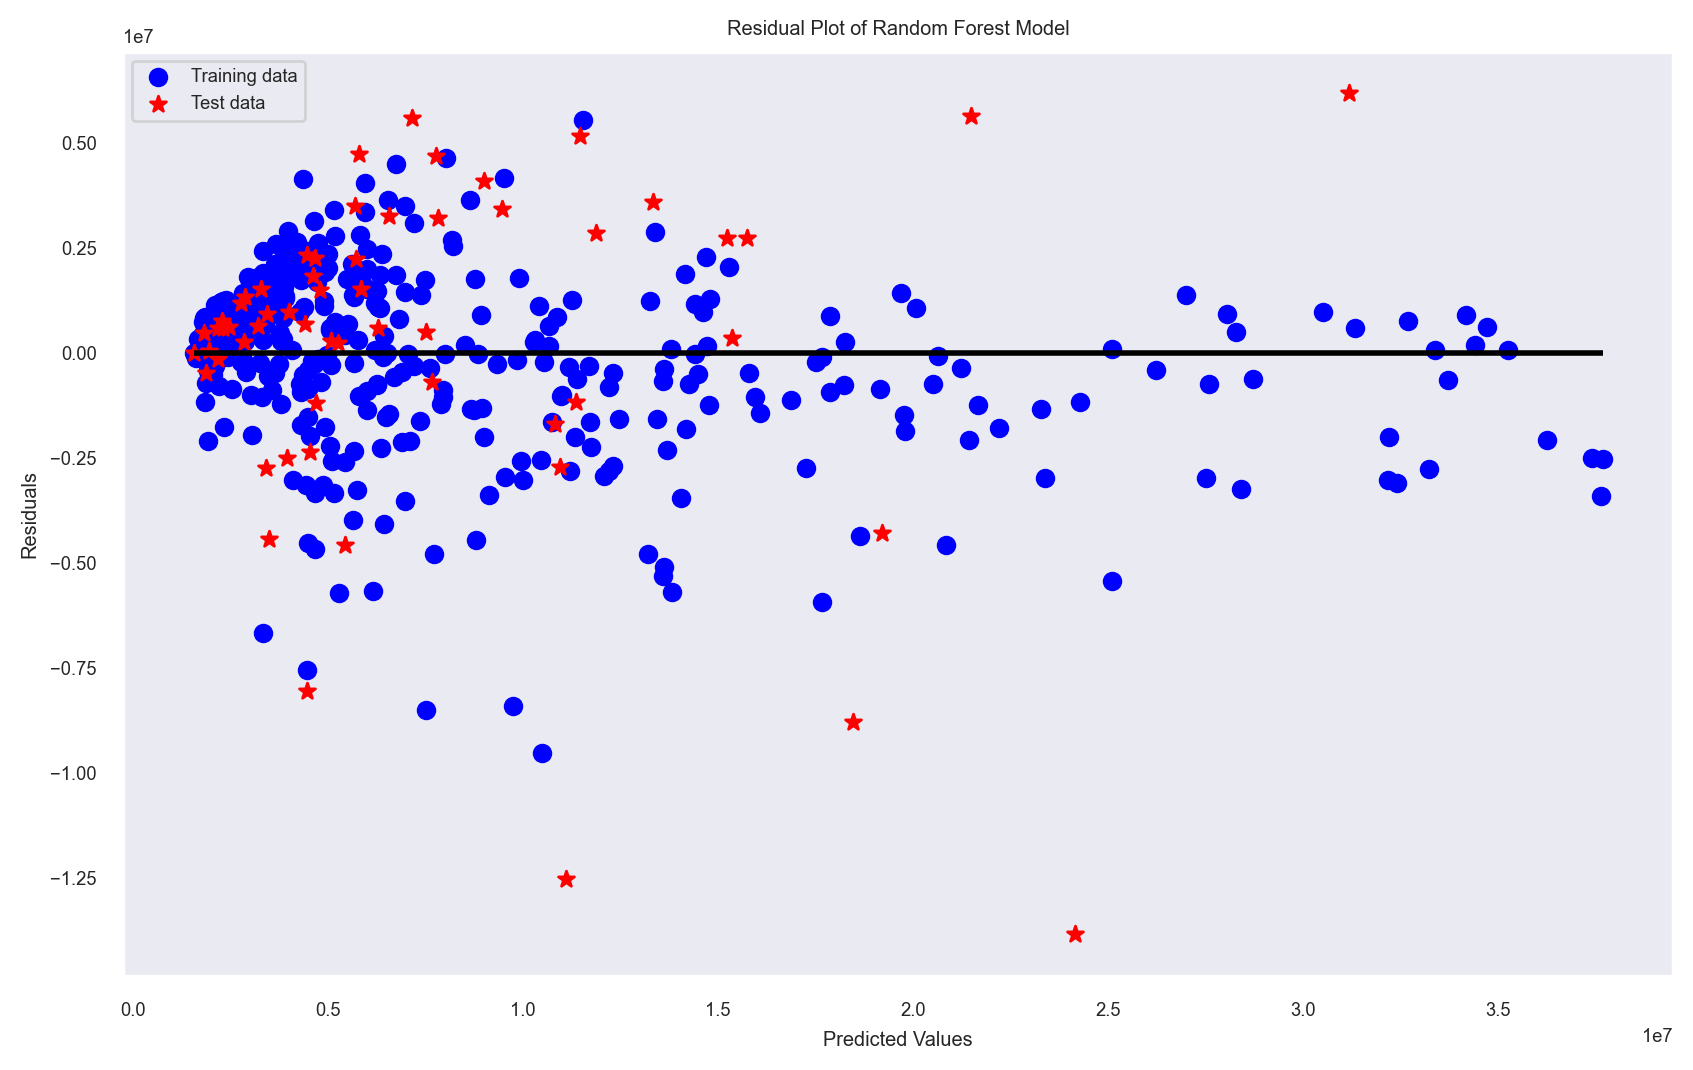

In [322]:
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred, y_train_pred - y_train, c="blue", marker="o", label="Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c="red", marker="*", label="Test data")
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot of Random Forest Model')
plt.hlines(y=0, xmin=np.min(y_train_pred), xmax=np.max(y_train_pred), color='black', lw=2)
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [323]:
#!pip install shap

In [324]:
import shap
explainer = shap.KernelExplainer(xgb_model.predict, scaled_X_test)
shap_values = explainer.shap_values(scaled_X_test)

shap.initjs()

  0%|          | 0/58 [00:00<?, ?it/s]

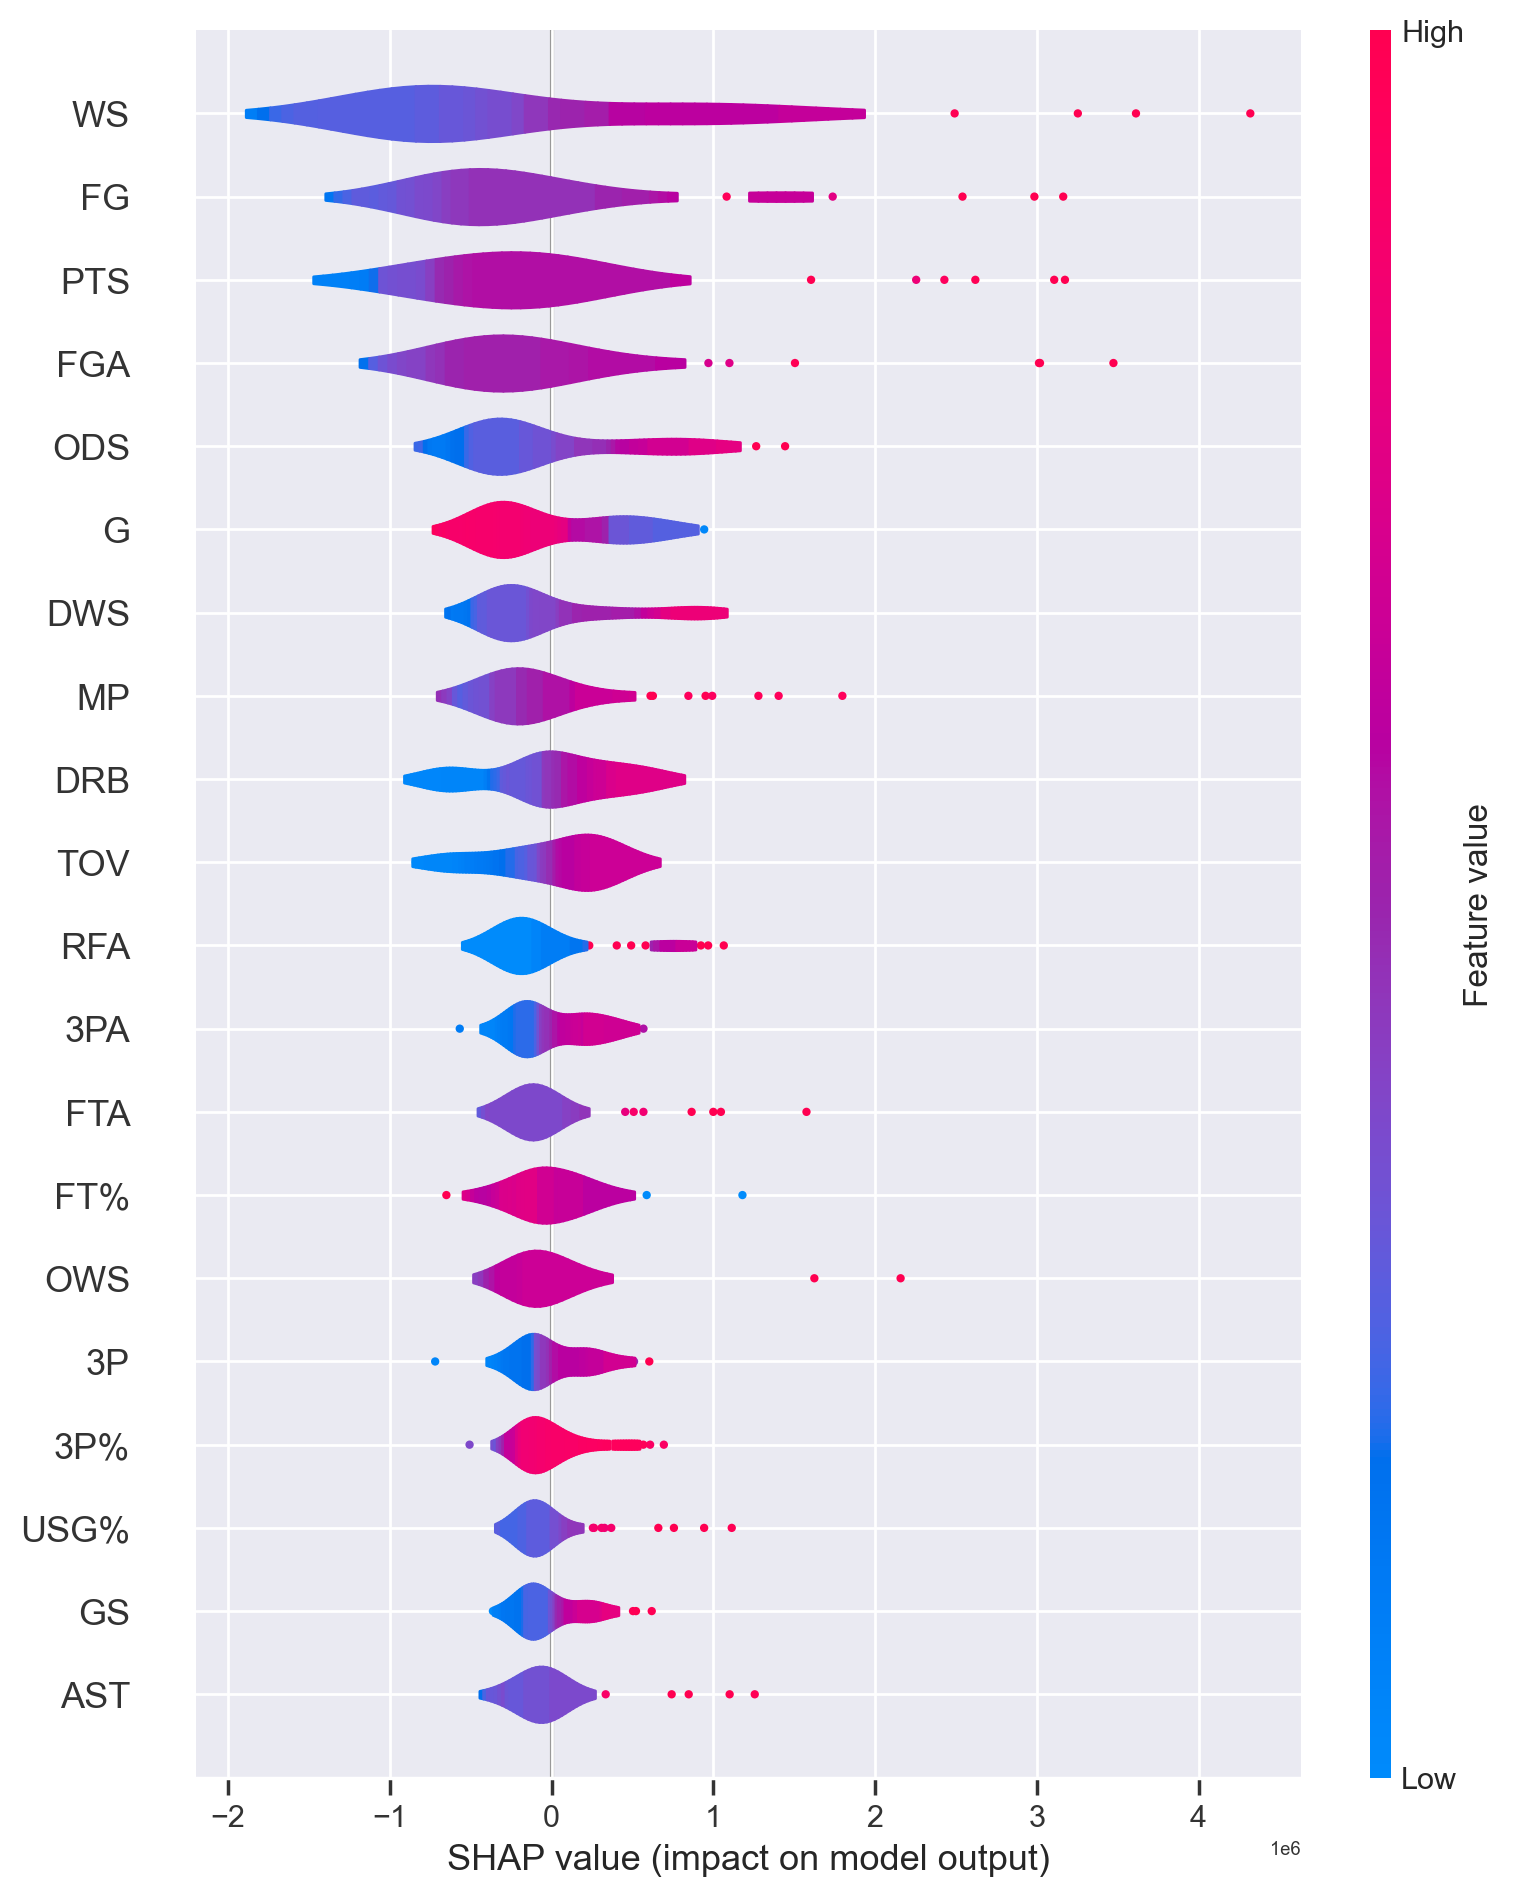

In [325]:
shap.summary_plot(shap_values, X_test, plot_type='violin') # Top 20 variáveis


### Prediction

In [208]:
df2.columns

Index(['Deal_Year', 'Salary Cap', 'Luxury Tax Line'], dtype='object', name=0)

In [209]:
df3 = pd.read_excel('NBA Talent Analysis Part BandC data.xlsx', sheet_name = 'Forecast Data')
new_df3 = pd.merge(df3, df2, on='Deal_Year', how='left')

#df2 = pd.read_excel('NBA Talent Analysis Part BandC data.xlsx', sheet_name = 'NBA Salary Cap History')

In [213]:
new_df3['PE'] = new_df3['PTS']/new_df3['MP']

#shooting efficicency - se
new_df3['SE'] = new_df3['FG']/new_df3['FGA']

##offensive and defensive wins share - ODS
new_df3['ODS'] = new_df3['OWS']+new_df3['DWS']

##Interaction between age and minutes played (Age * MP)
new_df3['EMP'] = new_df3['Age']*new_df3['MP']

In [214]:
#new_df3['Salary_Cap_Ratio'] = new_df3['Deal Average Salary'] / new_df3['Salary Cap']
#new_df3['Luxury_Tax_Difference'] = new_df3['Luxury Tax Line'] - new_df3['Deal Average Salary']

In [215]:
#X_test_new = new_df3.drop(columns={'Player', 'Deal Average Salary', 'Deal_Year','VORP'})
X_test_new = new_df3.drop(columns={'Player', 'Deal Average Salary', 'Deal_Year', 'Salary Cap', 'Luxury Tax Line','VORP','FG%','OWS','DWS','FGA','FG','MP'})

In [216]:
scaler = StandardScaler()

scaler.fit(X_train)
scaled_X_test = scaler.transform(X_test_new)
#scaled_X_test_dropped = scaled_X_test.dropna()
scaled_X_test

array([[ 0.59460884,  0.12337457,  1.31773683,  2.12605546,  1.92516052,
         0.79883149,  0.4704807 ,  2.01908883,  1.6149566 ,  1.22045212,
        -0.3957927 ,  0.69400157,  0.40619662, -0.04402205, -0.01255151,
        -0.74599423,  0.07702981, -0.62468316,  1.3750487 ,  0.99370288,
         0.70860807,  1.18185926,  1.26802423, -0.41891224,  1.81504736,
        -0.25268684,  1.30458824,  0.81659785],
       [ 0.35608704,  0.12337457,  1.31773683,  1.48724225,  1.29884198,
         0.82167948,  0.16284402,  1.02824531,  0.90052616,  0.61582409,
         0.06331813,  0.43627027,  0.34692637, -0.31893286,  0.15942049,
         0.12489646,  0.47093528,  1.1510232 ,  1.07080439,  0.47878826,
         0.06530406,  0.63876168,  0.23129432, -0.41891224,  1.00425788,
        -0.25155477,  0.23074535,  0.87230338],
       [-0.35947835, -0.25804718, -0.78165304,  2.5164413 ,  2.15228703,
         0.94353543,  1.21759835,  0.13065765,  0.00290842,  0.86631285,
        -0.37742826,  0.1355

In [217]:
y_test_pred = xgb_model.predict(scaled_X_test)

In [218]:
y_test_pred

array([20971772., 16896832.,  8436421.], dtype=float32)

In [219]:
df3['Deal Average Salary'] = y_test_pred

In [220]:
df3

,Player,Deal Average Salary,Deal_Year,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,3PAr,FTr,USG%,OWS,DWS,WS,VORP,RFA
0,Danny Glover,20971772.00,2020,31,62,62,1834,358,817,0.44,178,439,0.41,0.55,266,298,0.89,34,288,322,119,42,5,76,75,1160,0.54,0.36,24.60,4.50,1.90,6.30,2.40,0
1,Mike Meyers,16896832.00,2020,30,62,62,1936,355,810,0.44,142,348,0.41,0.53,181,220,0.82,59,252,311,86,47,30,97,180,1033,0.43,0.27,21.90,2.10,1.50,3.60,0.90,0
2,David Bowie,8436421.00,2020,27,54,4,1583,265,610,0.43,200,472,0.42,0.60,104,122,0.85,35,210,245,92,37,33,59,139,834,0.77,0.20,19.00,3.00,0.50,3.50,1.10,0
